<a href="https://colab.research.google.com/github/TomFrederik/lucent/blob/dev/notebooks/diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# The Diversity Objective

This notebook demonstrates the diversity objective, which is used to generate multiple different visualizations from a single neuron or channel.

## Install, Import, Load Model

In [2]:
!pip install --quiet git+https://github.com/TomFrederik/lucent.git

     |████████████████████████████████| 225 kB 5.2 MB/s 


In [3]:
import torch

from lucent.optvis import render, param, transform, objectives
from torchvision.models import googlenet

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = googlenet(pretrained=True)
_ = model.to(device).eval()

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

## An Example

With the diversity objective, we have to submit a batch of images for optimization. The diversity objective then tries to maximize the difference in feature representations between the images in the batch.

Specifically, the objective penalizes cosine similarity between the feature representations.

100%|██████████| 512/512 [00:23<00:00, 22.20it/s]



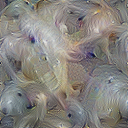
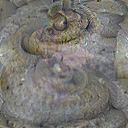
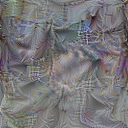
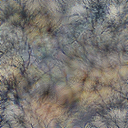

In [5]:
batch_param_f = lambda: param.image(128, batch=4)

obj = objectives.channel("inception5a", 9) - 1e2 * objectives.diversity("inception5a")

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

## More Examples

More examples reproducing results from the Distill article [Feature Visualization](https://distill.pub/2017/feature-visualization/). Note that we actually get different results. This is because we use a different version of InceptionV1 than the original Distill article.

100%|██████████| 512/512 [00:17<00:00, 28.56it/s]



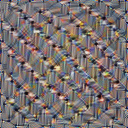
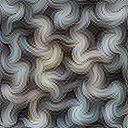
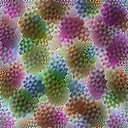
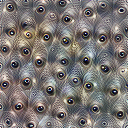

In [6]:
# Different curvy facets

obj = objectives.channel("inception4a", 97) - 1e3 * objectives.diversity("inception4a") # here we use a higher weight on the diversity term

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

100%|██████████| 512/512 [00:18<00:00, 28.21it/s]



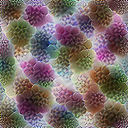
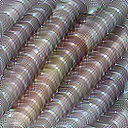
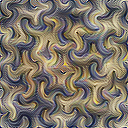
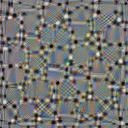

In [7]:
obj = objectives.channel("inception4a", 143) - 1e2 * objectives.diversity("inception4a")

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

100%|██████████| 512/512 [00:22<00:00, 23.01it/s]



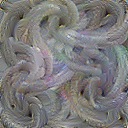
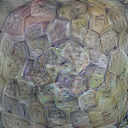
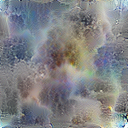
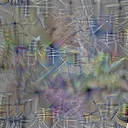

In [8]:
obj = objectives.channel("inception4e", 55) - 1e2 * objectives.diversity("inception4e")

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

## Try it out!

Select your favorite channel or neuron or just pick a random one! Try adjusting the weight on the diversity term to see how that makes a difference!

100%|██████████| 512/512 [00:19<00:00, 25.79it/s]



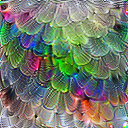
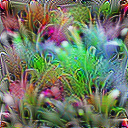
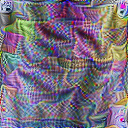
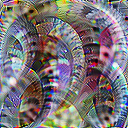

In [11]:
# Flowers and err... other stuff?

batch_param_f = lambda: param.image(128, batch=4, decorrelate=False) # disable channel decorrelation for more trippy images

obj = objectives.channel("inception4d->branch2->0", 139) - 1e2 * objectives.diversity("inception4d->branch2->0")

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)